In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
cc_dataframe = pd.read_csv('BankChurners.csv')

cc_dataframe.loc[cc_dataframe['Marital_Status'] == 'Unknown', 'Marital_Status'] = 'Single'
cc_dataframe.loc[cc_dataframe['Education_Level'] == 'Unknown', 'Education_Level'] = 'Uneducated'
del cc_dataframe["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
del cc_dataframe["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"]

In [15]:
#Table for reference
cc_dataframe.sample(100)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1987,793355508,Existing Customer,32,M,0,Graduate,Single,Less than $40K,Blue,26,...,3,3,6942.0,0,6942.0,0.544,2657,71,0.690,0.000
8837,712447758,Existing Customer,46,M,2,Graduate,Married,$80K - $120K,Blue,39,...,2,3,11901.0,2517,9384.0,0.781,7998,82,0.608,0.211
10102,720608658,Existing Customer,33,F,1,Uneducated,Single,Less than $40K,Blue,36,...,3,3,8398.0,1875,6523.0,0.727,16706,123,0.757,0.223
6492,779029458,Attrited Customer,54,F,1,Post-Graduate,Single,Less than $40K,Blue,35,...,3,3,1724.0,0,1724.0,0.670,2725,47,0.424,0.000
1316,711595833,Existing Customer,46,M,3,College,Married,$60K - $80K,Blue,36,...,2,2,9981.0,807,9174.0,0.655,1456,30,0.667,0.081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,772069683,Existing Customer,59,M,0,High School,Married,$60K - $80K,Blue,48,...,1,3,3868.0,1384,2484.0,0.631,4716,79,0.549,0.358
8196,712121508,Existing Customer,43,M,3,Uneducated,Single,$60K - $80K,Blue,30,...,2,0,1438.3,0,1438.3,0.751,5200,89,0.679,0.000
974,714131058,Existing Customer,30,M,0,Graduate,Single,$60K - $80K,Blue,36,...,5,3,18513.0,2517,15996.0,0.524,1567,33,0.941,0.136
1554,816033783,Existing Customer,26,M,0,High School,Single,$60K - $80K,Blue,21,...,2,3,1672.0,957,715.0,0.576,2099,34,0.417,0.572


In [16]:
print("Basic Information about the table:")
print("")
print("Dimentions:", cc_dataframe.shape)
print("")
print("Basic Staticical information:\n", cc_dataframe.describe())
print("")
print("Checking for null values:")
print(cc_dataframe.info())

Basic Information about the table:

Dimentions: (10127, 21)

Basic Staticical information:
           CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000          

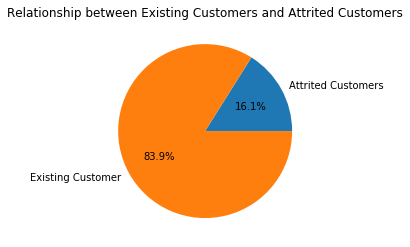

In [28]:
#Plot 1: Percent of People who are attrited vs Existing Customers
customer_attrition = cc_dataframe.groupby('Attrition_Flag')['CLIENTNUM'].count()
label_names = ['Attrited Customers','Existing Customer']
plt.pie(x = customer_attrition, autopct="%.1f%%", labels= label_names)
plt.title("Relationship between Existing Customers and Attrited Customers")
plt.show()

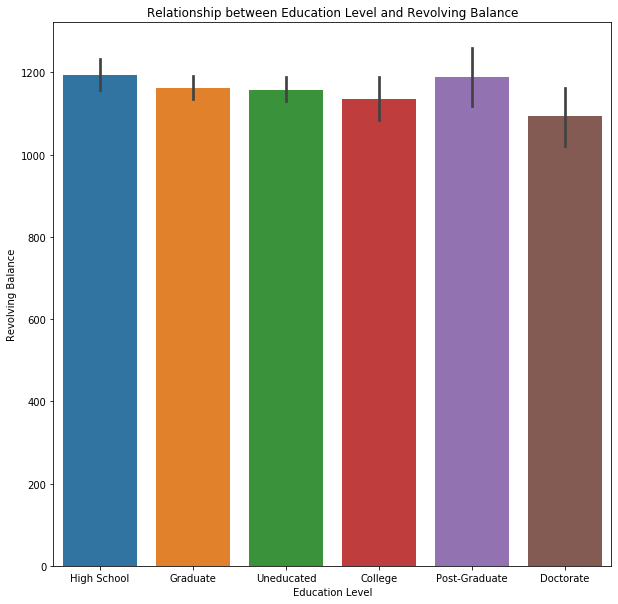

In [26]:
#plot 2: relationship between the education level and the total revolving balance
fig = plt.figure()
fig.set_figwidth(10) 
fig.set_figheight(10)
sns.barplot(x= 'Education_Level', y= 'Total_Revolving_Bal', data= cc_dataframe)
plt.xlabel("Education Level")
plt.ylabel("Revolving Balance")
plt.title("Relationship between Education Level and Revolving Balance")
plt.show()

We can see that education level has relatively low correlation to the revolving balance

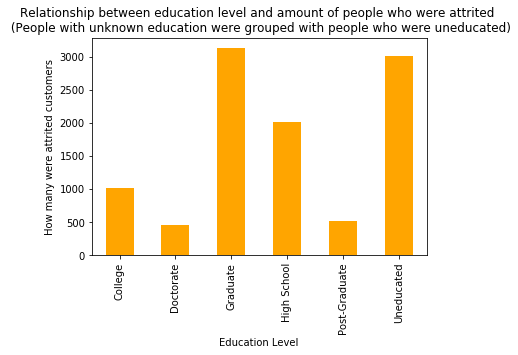

In [19]:
#Plot 3: Relationship between the Education level and amount of people Attrited
Educ_vs_flag = cc_dataframe.groupby('Education_Level')['Attrition_Flag'].count()
Educ_vs_flag.plot(kind= 'bar', color= 'orange')
plt.xlabel('Education Level')
plt.ylabel('How many were attrited customers')
plt.title("Relationship between education level and amount of people who were attrited \n (People with unknown education were grouped with people who were uneducated)")
plt.show()

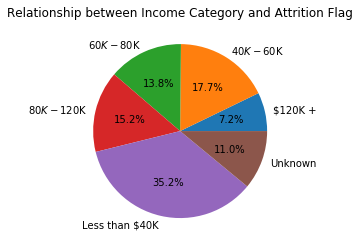

In [30]:
#plot 4: Relationship between income level and Attrition Flag
inclevel_vs_aflag = cc_dataframe.groupby('Income_Category')['Attrition_Flag'].count()
names = inclevel_vs_aflag.keys()
plt.pie(x = inclevel_vs_aflag, autopct="%.1f%%", labels= names)
plt.title("Relationship between Income Category and Attrition Flag")
plt.show()

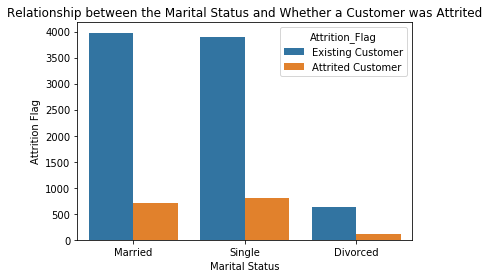

In [31]:
# Plot 5: Relationship between marital status and the attriation flag
sns.countplot(x= 'Marital_Status', hue= 'Attrition_Flag', data= cc_dataframe)
plt.ylabel('Attrition Flag')
plt.xlabel('Marital Status')
plt.title("Relationship between the Marital Status and Whether a Customer was Attrited")
plt.show()

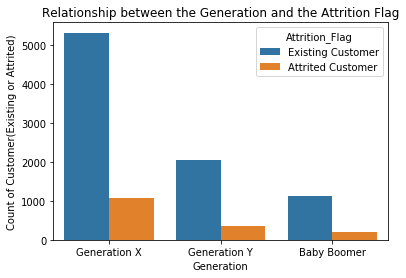

In [34]:
def generation(age):
    if(75 <= age <= 95):
        return "Silent Generation"
    elif(56 <= age <= 74):
        return "Baby Boomer"
    elif(41 <= age <= 55):
        return "Generation X"
    elif(26 <= age <= 40):
        return "Generation Y"
    elif(8 <= age <= 25):
        return "Generation Z"
cc_dataframe['Generation'] = cc_dataframe['Customer_Age'].map(lambda x: generation(x))
cc_dataframe

#plot 6: Relationship between generation and attrition flag
sns.countplot(x= 'Generation', hue= 'Attrition_Flag', data= cc_dataframe)
plt.title("Relationship between the Generation and the Attrition Flag")
plt.ylabel("Count of Customer(Existing or Attrited)")
plt.show()

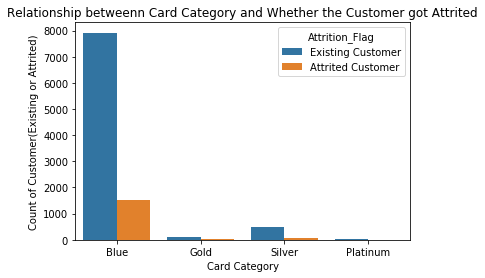

In [35]:
#plot 7: Card Category vs Attrition Flag

sns.countplot(x= 'Card_Category', hue= 'Attrition_Flag', data= cc_dataframe)
plt.xlabel("Card Category")
plt.ylabel("Count of Customer(Existing or Attrited)")
plt.title("Relationship betweenn Card Category and Whether the Customer got Attrited")
plt.show()

In [41]:
# Developing Random Forest Model:
cc_dataframe.replace(['Uneducated','High School','College','Graduate','Post-Graduate','Doctorate'], [0, 1, 2, 3, 4, 5], inplace= True)
cc_dataframe.replace(['M', 'F'], [0, 1], inplace= True)
cc_dataframe.replace(['Married','Single','Divorced'], [0, 1, 2], inplace= True)
cc_dataframe.replace(['$60K - $80K','Less than $40K','$80K - $120K','$40K - $60K','$120K +','Unknown'], [70000, 40000, 100000, 50000,120000,76000], inplace= True)
cc_dataframe.replace(['Existing Customer','Attrited Customer'], [1, 0], inplace = True)
cc_dataframe.replace(['Generation X', 'Generation Y', 'Baby Boomer'], (1, 2, 0), inplace= True)

y_var = cc_dataframe['Attrition_Flag']
x_var = cc_dataframe.drop(['Attrition_Flag','Card_Category'], axis= 1)

In [44]:
import pickle
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.33)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randf = RandomForestClassifier()

randf.fit(x_train, y_train)

predictions_y = randf.predict(x_test)

score = round(accuracy_score(predictions_y, y_test) *100, 2)
print("Accuracy:",score)

Accuracy: 95.87
